In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
msk=np.random.rand(len(cdf))<0.8
train=cdf[msk]
test=cdf[~msk]
# train model


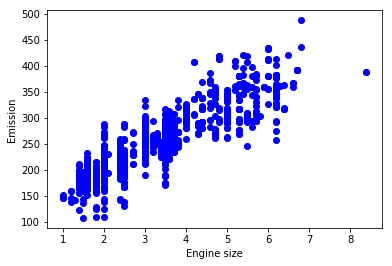

In [3]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
print(train_x[0:6])
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[2.4]
 [1.5]
 [3.5]
 [3.5]
 [3.5]
 [3.5]]


array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [5]:
poly =PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly[0:2]

array([[1.  , 2.4 , 5.76],
       [1.  , 1.5 , 2.25]])

In [11]:
from sklearn import linear_model


regr= linear_model.LinearRegression()

regr.fit(train_x_poly,train_y)
print(regr.coef_,"intercepy ",regr.intercept_)


[[ 0.         50.63918978 -1.45279628]] intercepy  [106.52783189]


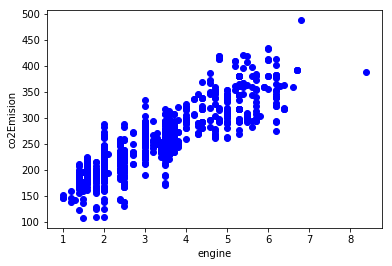

In [12]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel("engine")
plt.ylabel('co2Emision')
plt.show()

In [ ]:
regr2=linear_model.LinearRegression(train_x,train_y)
regr2.fit(train_x,train_y)



Text(0,0.5,'Emission')

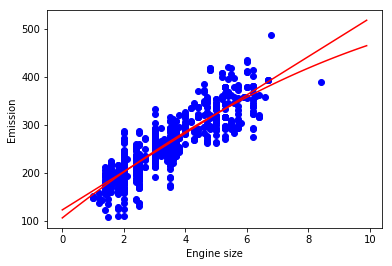

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
regr2=linear_model.LinearRegression()
regr2.fit(train_x,train_y)
XX2 = np.arange(0.0, 10.0, 0.1)
yy2 = regr2.intercept_[0]+ regr2.coef_[0][0]*XX2
plt.plot(XX2, yy2, '-r' )
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [20]:
from sklearn.metrics import r2_score
test_x_poly=poly.fit_transform(test_x)
y_hat=regr.predict(test_x_poly)
print(" mean absolute error ", np.mean(np.absolute(test_y-y_hat)))
print(" Residual sum of squares  ", np.mean((test_y-y_hat)**2))
print(" r²  ", r2_score(y_hat,test_y)) 



 mean absolute error  24.27066286252519
 Residual sum of squares   1054.4553464408004
 r²   0.6956535724126028


# polynome regression of cubic

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
train_x_poly=poly.fit_transform(train_x)
test_x_poly=poly.fit_transform(test_x)

from sklearn import linear_model
regr =linear_model.LinearRegression()
regr.fit(train_x_poly,train_y)
# evaluation
from sklearn.metrics import r2_score
y_hat=regr.predict(test_x_poly)
 
print(" r²  ", r2_score(y_hat,test_y)) 



 r²   0.6923457008495489


Coefficients:  [[ 0.         26.98512935  5.21829588 -0.56738378]]
Intercept:  [131.13985013]
Mean absolute error: 24.04
Residual sum of squares (MSE): 1052.12
R2-score: 0.69


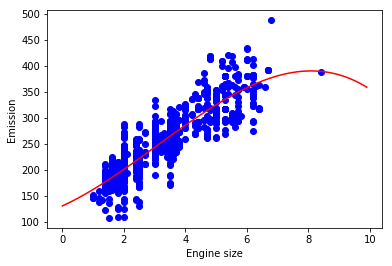

In [27]:



poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

# step of plynomial regression
cond : the data is like curvy
        one idp variable
same step regression -> test train split 
creat new features (1 ,x,x2) with polynome feature +fir transform

